# Mushroom classification

Dataset source - [UCI ML](https://archive.ics.uci.edu/ml/datasets/Secondary+Mushroom+Dataset)

This dataset includes 61069 hypothetical mushrooms with caps based on 173 species (353 mushrooms per species). Each mushroom is identified as definitely edible, definitely poisonous, or of unknown edibility and not recommended (the latter class was combined with the poisonous class).

Будем использовать этот датасет для определения съедобности и несъедобности грибов.


## Import libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Read Data
Нужные нам данные содержатся в secondary_data.csv

In [ ]:
df = pd.read_csv('data/secondary_data.csv', sep=';')
df.head()

,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,...,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
0,p,15.26,x,g,o,f,e,NaN,w,16.95,...,s,y,w,u,w,t,g,NaN,d,w
1,p,16.60,x,g,o,f,e,NaN,w,17.99,...,s,y,w,u,w,t,g,NaN,d,u
2,p,14.07,x,g,o,f,e,NaN,w,17.80,...,s,y,w,u,w,t,g,NaN,d,w
3,p,14.17,f,h,e,f,e,NaN,w,15.77,...,s,y,w,u,w,t,p,NaN,d,w
4,p,14.64,x,h,o,f,e,NaN,w,16.53,...,s,y,w,u,w,t,p,NaN,d,w


- **class: poisonous=p, edibile=e (binary)**
- cap-diameter (m): float number in cm
- cap-shape (n): bell=b, conical=c, convex=x, flat=f,sunken=s, spherical=p, others=o
- cap-surface (n): fibrous=i, grooves=g, scaly=y, smooth=s, shiny=h, leathery=l, silky=k, sticky=t, wrinkled=w, fleshy=e
- cap-color (n): brown=n, buff=b, gray=g, green=r, pink=p, purple=u, red=e, white=w, yellow=y, blue=l, orange=o, black=k
- does-bruise-bleed (n): bruises-or-bleeding=t,no=f
- gill-attachment (n): adnate=a, adnexed=x, decurrent=d, free=e, sinuate=s, pores=p, none=f, unknown=?
- gill-spacing (n): close=c, distant=d, none=f
- gill-color (n): see cap-color + none=f
- stem-height (m): float number in cm
- stem-width (m): float number in mm
- stem-root (n): bulbous=b, swollen=s, club=c, cup=u, equal=e, rhizomorphs=z, rooted=r
- stem-surface (n): see cap-surface + none=f
- stem-color (n): see cap-color + none=f
- veil-type (n): partial=p, universal=u
- veil-color (n): see cap-color + none=f
- has-ring (n): ring=t, none=f
- ring-type (n): cobwebby=c, evanescent=e, flaring=r, grooved=g,large=l, pendant=p, sheathing=s, zone=z, scaly=y, movable=m, none=f, unknown=?
- spore-print-color (n): see cap color
- habitat (n): grasses=g, leaves=l, meadows=m, paths=p, heaths=h, urban=u, waste=w, woods=d
- season (n): spring=s, summer=u, autumn=a, winter=w

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61069 entries, 0 to 61068
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   class                 61069 non-null  object 
 1   cap-diameter          61069 non-null  float64
 2   cap-shape             61069 non-null  object 
 3   cap-surface           46949 non-null  object 
 4   cap-color             61069 non-null  object 
 5   does-bruise-or-bleed  61069 non-null  object 
 6   gill-attachment       51185 non-null  object 
 7   gill-spacing          36006 non-null  object 
 8   gill-color            61069 non-null  object 
 9   stem-height           61069 non-null  float64
 10  stem-width            61069 non-null  float64
 11  stem-root             9531 non-null   object 
 12  stem-surface          22945 non-null  object 
 13  stem-color            61069 non-null  object 
 14  veil-type             3177 non-null   object 
 15  veil-color         

## EDA
### Missing data

In [ ]:
df.isna().sum()/df.shape[0]

class                   0.000000
cap-diameter            0.000000
cap-shape               0.000000
cap-surface             0.231214
cap-color               0.000000
does-bruise-or-bleed    0.000000
gill-attachment         0.161850
gill-spacing            0.410405
gill-color              0.000000
stem-height             0.000000
stem-width              0.000000
stem-root               0.843931
stem-surface            0.624277
stem-color              0.000000
veil-type               0.947977
veil-color              0.878613
has-ring                0.000000
ring-type               0.040462
spore-print-color       0.895954
habitat                 0.000000
season                  0.000000
dtype: float64

В данных отсутствуют только категориальные переменные. Заменим NA специальным значением не встречающимся нигде: "na"

In [ ]:
df.fillna('na', inplace=True)
df.isna().sum()

class                   0
cap-diameter            0
cap-shape               0
cap-surface             0
cap-color               0
does-bruise-or-bleed    0
gill-attachment         0
gill-spacing            0
gill-color              0
stem-height             0
stem-width              0
stem-root               0
stem-surface            0
stem-color              0
veil-type               0
veil-color              0
has-ring                0
ring-type               0
spore-print-color       0
habitat                 0
season                  0
dtype: int64

In [ ]:
df['class'].value_counts(normalize=True)

p    0.554913
e    0.445087
Name: class, dtype: float64

В данных нет сильного дисбаланса классов.

## Numeric variables

In [ ]:
df.describe()

,cap-diameter,stem-height,stem-width
count,61069.000000,61069.000000,61069.000000
mean,6.733854,6.581538,12.149410
std,5.264845,3.370017,10.035955
min,0.380000,0.000000,0.000000
25%,3.480000,4.640000,5.210000
50%,5.860000,5.950000,10.190000
75%,8.540000,7.740000,16.570000
max,62.340000,33.920000,103.910000


In [ ]:
num

Посмотрим на распределение числовых переменных в разрезе классов.

In [ ]:
num_long = df[['class', 'cap-diameter', 'stem-height', 'stem-width']].melt(id_vars='class')

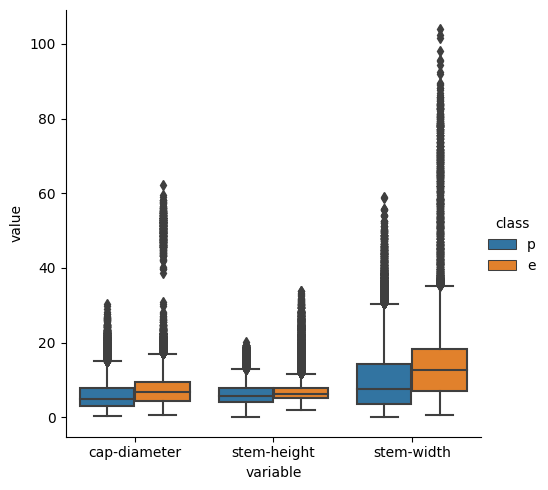

In [ ]:
sns.catplot(data=num_long, kind='box', x='variable', y='value', hue='class')
plt.show()

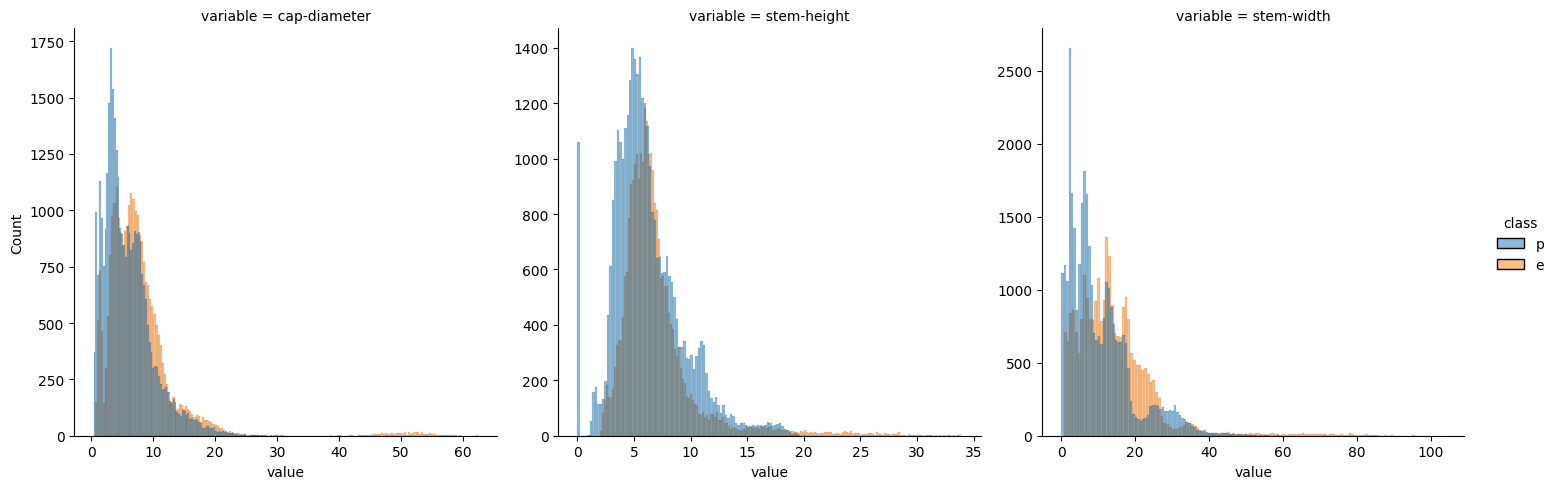

In [ ]:
sns.displot(data=num_long, kind='hist', 
            x='value', hue='class', 
            col='variable', alpha=0.5,
            facet_kws={'sharey':False, 'sharex': False}, 
            common_bins=False)
plt.show()

## Categorical variables